In [10]:
import pandas as pd        
import seaborn as sns
import matplotlib.pyplot as plt

In [91]:
import warnings
warnings.filterwarnings('ignore')

In [92]:
dataset = pd.read_csv("heart.csv")

In [93]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [94]:
# Checking Null values
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [95]:
# Checking Duplicated values
dataset.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

In [96]:
# More information about data
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [97]:
dataset["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [98]:
# Separation dependent and independent features
x = dataset.drop(columns=["target"])
y = dataset["target"]

In [99]:
# Making training and testings datas
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [100]:
# importing model
from sklearn.linear_model import LogisticRegression

In [101]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [102]:
lr.score(x_test,y_test)*100

88.52459016393442

In [103]:
lr.predict([[51,1,0,140,298,0,1,122,1,4.2,1,3,3]])

array([0], dtype=int64)

In [104]:
from sklearn.metrics import confusion_matrix

In [105]:
# Predict the labels for x_test
y_pred = lr.predict(x_test)

In [106]:
cm = confusion_matrix(y_test, y_pred)

In [107]:
print(cm)

[[25  4]
 [ 3 29]]


<Axes: >

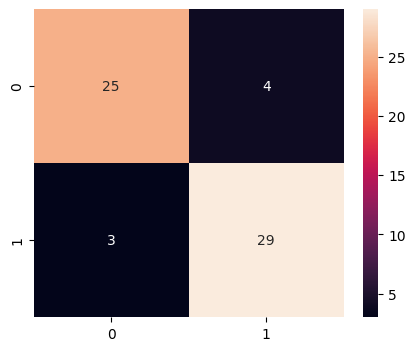

In [108]:
# Visualize the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True,)

In [109]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [90]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)*100
print(f'Accuracy: {accuracy} %')

# Calculate precision
precision = precision_score(y_test, y_pred)*100
print(f'Precision: {precision} %')

# Calculate recall
recall = recall_score(y_test, y_pred)*100
print(f'Recall: {recall} %')

# Calculate F1 score
f1 = f1_score(y_test, y_pred)*100
print(f'F1 Score: {f1} %')

Accuracy: 88.52459016393442 %
Precision: 87.87878787878788 %
Recall: 90.625 %
F1 Score: 89.23076923076924 %
